![alt text](img/LM.png)
# Kurs: Analiza danych i programowanie w Pythonie
## Piotr Ćwiakowski

### Lekcja 11. Case study: Explanatory Data Analysis w Pythonie

#### Spis treści

1. Bikesharing case study

## 1. Bikesharing case study

Zacznijmy od analizy szeregu czasowych popytu na rowery miejskie. Opis danych i sam plik znajdują się w folderze datasets.

In [2]:
# =========================================
# Data Set
# =========================================
# Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather 
# conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data 
# set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, 
# Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data 
# on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather 
# information are extracted from http://www.freemeteo.com. 

# =========================================
# Dataset characteristics
# =========================================	
# Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
# 	- instant: record index
# 	- dteday : date
# 	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
# 	- yr : year (0: 2011, 1:2012)
# 	- mnth : month ( 1 to 12)
# 	- hr : hour (0 to 23)
# 	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# 	- weekday : day of the week
# 	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# 	+ weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# 	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
# 	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
# 	- hum: Normalized humidity. The values are divided to 100 (max)
# 	- windspeed: Normalized wind speed. The values are divided to 67 (max)
# 	- casual: count of casual users
# 	- registered: count of registered users
# 	- cnt: count of total rental bikes including both casual and registered

In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
# from colormaps import cmaps 
%matplotlib inline

C:\Users\pcwia\.conda\envs\ds\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Wczytanie i podstawowa analiza zbioru (pakiet pandas)

Źródło: https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

In [25]:
# Wczytanie danych
bs = pd.read_csv("datasets/bikesharing_prepared.csv", index_col = 0,
                sep = ',', header = 0)

In [26]:
# Sprawdźmy kształt
bs.shape

(10886, 13)

In [27]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  object 
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  object 
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   date        10886 non-null  object 
 10  hour        10886 non-null  int64  
 11  weekday     10886 non-null  object 
 12  month       10886 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 1.2+ MB


In [28]:
# Kilka pierwszych obserwacji
bs.head()

season  holiday  workingday  \
0  Spring        0           0   
1  Spring        0           0   
2  Spring        0           0   
3  Spring        0           0   
4  Spring        0           0   

                                             weather  temp   atemp  humidity  \
0   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        81   
1   Clear + Few clouds + Partly cloudy + Partly c...  9.02  13.635        80   
2   Clear + Few clouds + Partly cloudy + Partly c...  9.02  13.635        80   
3   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        75   
4   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        75   

   windspeed  count        date  hour   weekday    month  
0        0.0     16  2011-01-01     0  Saturday  January  
1        0.0     40  2011-01-01     1  Saturday  January  
2        0.0     32  2011-01-01     2  Saturday  January  
3        0.0     13  2011-01-01     3  Saturday  January  
4        0.0      1  2011-01-01     4  Saturday  January

In [29]:
# Typy danych
bs.dtypes

season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
date           object
hour            int64
weekday        object
month          object
dtype: object

In [30]:
pd.DataFrame(bs.dtypes.value_counts())

0
int64    5
object   5
float64  3

## 2. Pakiet pandas

## 2.1 Operacje na kolumnach

In [31]:
# Wybieranie pojedynczej kolumny:
bs['season']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
10881    Winter
10882    Winter
10883    Winter
10884    Winter
10885    Winter
Name: season, Length: 10886, dtype: object

In [32]:
# Wybranie kilku kolumn:
bs[['count', 'season', 'temp']]

count  season   temp
0         16  Spring   9.84
1         40  Spring   9.02
2         32  Spring   9.02
3         13  Spring   9.84
4          1  Spring   9.84
...      ...     ...    ...
10881    336  Winter  15.58
10882    241  Winter  14.76
10883    168  Winter  13.94
10884    129  Winter  13.94
10885     88  Winter  13.12

[10886 rows x 3 columns]

In [33]:
# lista wszystkich kolumn
bs.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'date', 'hour', 'weekday', 'month'],
      dtype='object')

In [35]:
# Utworzenie nowej kolumny
bs['season2'] = 1
bs['przyklad'] = bs['temp']*bs['humidity']

In [36]:
bs.head()

season  holiday  workingday  \
0  Spring        0           0   
1  Spring        0           0   
2  Spring        0           0   
3  Spring        0           0   
4  Spring        0           0   

                                             weather  temp   atemp  humidity  \
0   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        81   
1   Clear + Few clouds + Partly cloudy + Partly c...  9.02  13.635        80   
2   Clear + Few clouds + Partly cloudy + Partly c...  9.02  13.635        80   
3   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        75   
4   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        75   

   windspeed  count        date  hour   weekday    month  season2  przyklad  
0        0.0     16  2011-01-01     0  Saturday  January        1    797.04  
1        0.0     40  2011-01-01     1  Saturday  January        1    721.60  
2        0.0     32  2011-01-01     2  Saturday  January        1    721.60  
3        0.0     13  2011-01-01     3  Saturday  January        1    738.00  
4        0.0      1  2011-01-01     4  Saturday  January        1    738.00

In [38]:
bs.drop(columns = ['season2', 'przyklad'], inplace = True)

In [39]:
# bs = bs.drop(columns = ['season2', 'przyklad'], inplace = False)

In [40]:
bs.head()

season  holiday  workingday  \
0  Spring        0           0   
1  Spring        0           0   
2  Spring        0           0   
3  Spring        0           0   
4  Spring        0           0   

                                             weather  temp   atemp  humidity  \
0   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        81   
1   Clear + Few clouds + Partly cloudy + Partly c...  9.02  13.635        80   
2   Clear + Few clouds + Partly cloudy + Partly c...  9.02  13.635        80   
3   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        75   
4   Clear + Few clouds + Partly cloudy + Partly c...  9.84  14.395        75   

   windspeed  count        date  hour   weekday    month  
0        0.0     16  2011-01-01     0  Saturday  January  
1        0.0     40  2011-01-01     1  Saturday  January  
2        0.0     32  2011-01-01     2  Saturday  January  
3        0.0     13  2011-01-01     3  Saturday  January  
4        0.0      1  2011-01-01     4  Saturday  January

## 2.2. Operacje na wierszach

Są dwie podstawowe możliwości query i loc.

In [17]:
bs.loc[(bs.season == 'Spring') & (bs.temp > 10)].head()

season  holiday  workingday  \
9   Spring        0           0   
10  Spring        0           0   
11  Spring        0           0   
12  Spring        0           0   
13  Spring        0           0   

                                              weather   temp   atemp  \
9    Clear + Few clouds + Partly cloudy + Partly c...  13.12  17.425   
10   Clear + Few clouds + Partly cloudy + Partly c...  15.58  19.695   
11   Clear + Few clouds + Partly cloudy + Partly c...  14.76  16.665   
12   Clear + Few clouds + Partly cloudy + Partly c...  17.22  21.210   
13   Mist + Cloudy, Mist + Broken clouds, Mist + F...  18.86  22.725   

    windspeed  count        date  hour   weekday    month  przyklad  
9      0.0000     14  2011-01-01     9  Saturday  January    997.12  
10    16.9979     36  2011-01-01    10  Saturday  January   1184.08  
11    19.0012     56  2011-01-01    11  Saturday  January   1195.56  
12    19.0012     84  2011-01-01    12  Saturday  January   1325.94  
13    19.9995     94  2011-01-01    13  Saturday  January   1357.92

In [18]:
bs.query('season == "Spring" and temp > 10').head()

season  holiday  workingday  \
9   Spring        0           0   
10  Spring        0           0   
11  Spring        0           0   
12  Spring        0           0   
13  Spring        0           0   

                                              weather   temp   atemp  \
9    Clear + Few clouds + Partly cloudy + Partly c...  13.12  17.425   
10   Clear + Few clouds + Partly cloudy + Partly c...  15.58  19.695   
11   Clear + Few clouds + Partly cloudy + Partly c...  14.76  16.665   
12   Clear + Few clouds + Partly cloudy + Partly c...  17.22  21.210   
13   Mist + Cloudy, Mist + Broken clouds, Mist + F...  18.86  22.725   

    windspeed  count        date  hour   weekday    month  przyklad  
9      0.0000     14  2011-01-01     9  Saturday  January    997.12  
10    16.9979     36  2011-01-01    10  Saturday  January   1184.08  
11    19.0012     56  2011-01-01    11  Saturday  January   1195.56  
12    19.0012     84  2011-01-01    12  Saturday  January   1325.94  
13    19.9995     94  2011-01-01    13  Saturday  January   1357.92

In [41]:
tabele_kwerenda = bs.query('season == "Spring" and temp > 10')

In [42]:
tabele_kwerenda.shape

(1636, 13)

## 2.3. Grupowanie i agregacja 

In [49]:
from IPython.display import display

In [57]:
# grupowanie
bsGR_hour_seas = bs.groupby(["hour","season"])
bsGR_hour_wday = bs.groupby(["hour","weekday"])

In [58]:
# agregacja
hourAggSeas = bsGR_hour_seas["count"].mean().reset_index()
hourAggWday = bsGR_hour_wday["count"].mean().reset_index()

In [59]:
# Obejrzyjmy wyniki:
hourAggSeas

hour  season       count
0      0    Fall   75.675439
1      0  Spring   28.292035
2      0  Summer   58.473684
3      0  Winter   57.877193
4      1    Fall   44.831858
..   ...     ...         ...
91    22  Winter  126.412281
92    23    Fall  121.719298
93    23  Spring   45.333333
94    23  Summer  101.684211
95    23  Winter   89.298246

[96 rows x 3 columns]

In [60]:
hourAggWday

hour    weekday       count
0       0     Friday   53.234375
1       0     Monday   35.492308
2       0   Saturday   98.212121
3       0     Sunday   96.227273
4       0   Thursday   37.476923
..    ...        ...         ...
163    23   Saturday  120.030303
164    23     Sunday   64.757576
165    23   Thursday   99.630769
166    23    Tuesday   76.061538
167    23  Wednesday   80.138462

[168 rows x 3 columns]

## 2.4. Formatowanie warunkowe

In [61]:
# Wykonajmy prostą tablicę krzyżową
tab = pd.crosstab(index = bs['season'], columns = bs['weekday'], values = bs['count'], aggfunc = 'mean').round()
tab

weekday  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
season                                                                 
Fall      238.0   231.0     242.0   223.0     235.0    229.0      245.0
Spring    127.0   113.0     115.0   102.0     128.0    113.0      116.0
Summer    218.0   204.0     233.0   216.0     226.0    208.0      203.0
Winter    207.0   205.0     202.0   177.0     205.0    204.0      193.0

In [67]:
tab.style.background_gradient(cmap='PuBu', axis=0).format("{:5.1f}")

In [68]:
tab.style.background_gradient(cmap='PuBu', axis=1).format("{:5.1f}")

In [69]:
tab.style.background_gradient(cmap='PuBu', axis=None).format("{:5.1f}")

In [63]:
tab.style.highlight_max(axis=1).format("{:5.1f}")

## 3. Analiza zmiennej objaśnianej

### 3.1. Analiza rozkładu empirycznego

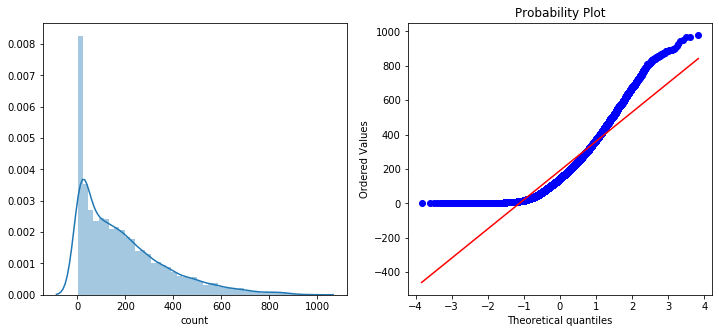

In [18]:
# Macierz wykresów 2x2
fig, axes = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(12, 5)
# Funkcja gęstości
sn.distplot(bs["count"],ax=axes[0])
# Wykres kwantylowy 
stats.probplot(bs["count"], dist='norm', fit=True, plot=axes[1])
plt.show()

### 3.2 Analiza szeregu czasowego

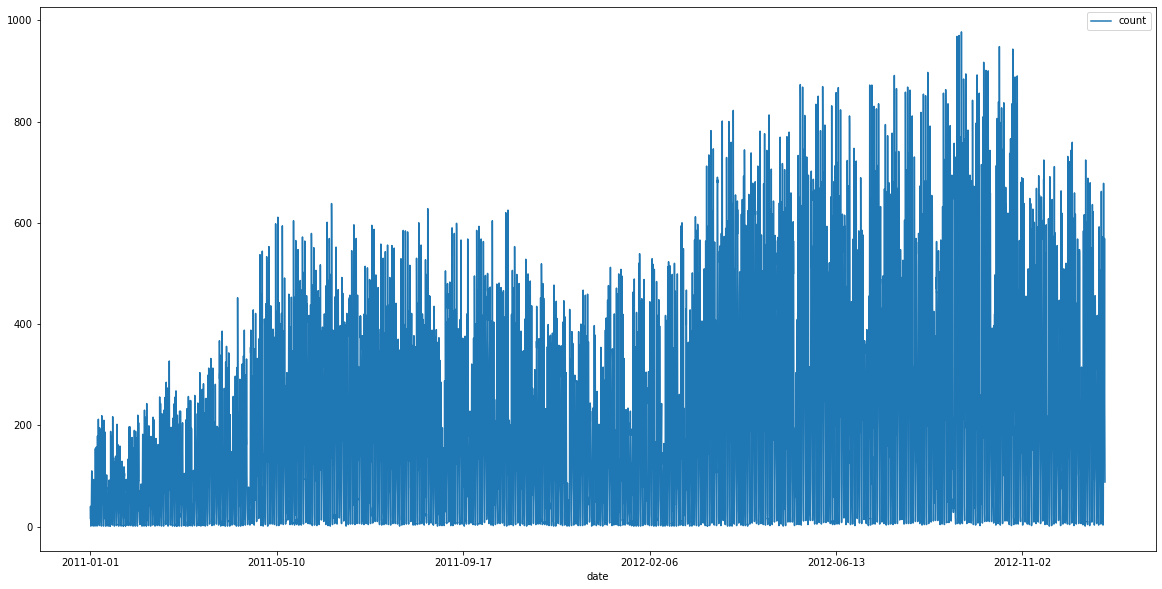

In [70]:
fig,ax = plt.subplots(ncols=1,nrows=1)
fig.set_size_inches(20, 10)
bs.plot('date', 'count', kind = 'line', ax = ax)

In [71]:
# Dane są bardzo wysokiej rodzielczości (24 obserwacje na dobę), spróbujmy spojrzeć na dane dzienne:
bs_ts = bs.groupby('date').agg({'count': 'sum'})
bs_ts

count
date             
2011-01-01    985
2011-01-02    801
2011-01-03   1349
2011-01-04   1562
2011-01-05   1600
...           ...
2012-12-15   5047
2012-12-16   3786
2012-12-17   4585
2012-12-18   5557
2012-12-19   5267

[456 rows x 1 columns]

In [72]:
# zdefiniowanie jednostki czasu jako indeksu obserwacji - wygenerowanie szeregu czasowego:
bs_ts.index = pd.to_datetime(bs_ts.index)

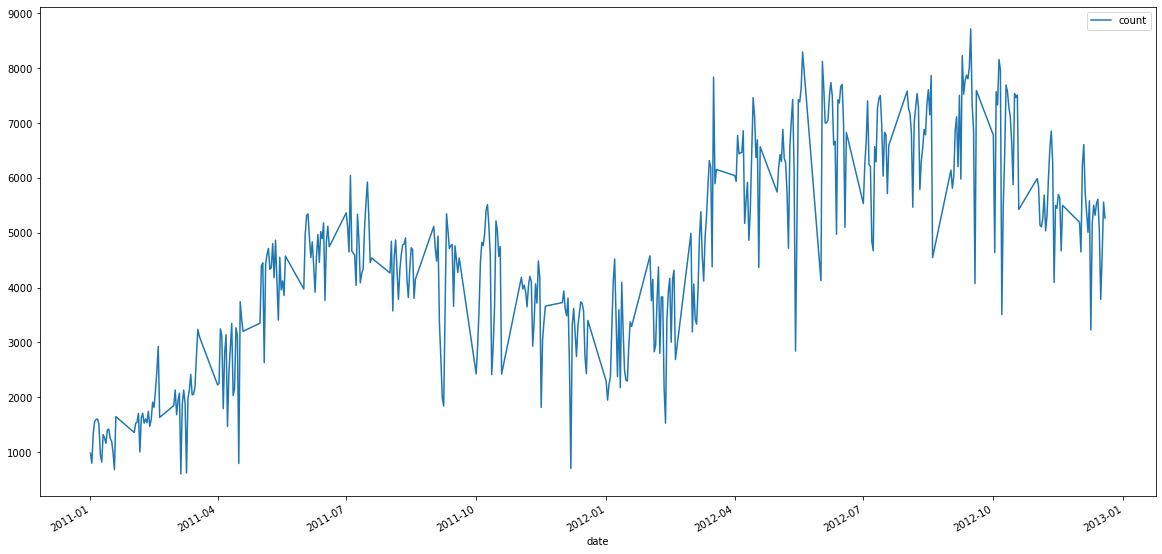

In [73]:
# Wygenerowanie wykresu dla danych zagregowanych:
fig,ax = plt.subplots(ncols=1,nrows=1)
fig.set_size_inches(20, 10)
bs_ts.plot( ax = ax)

### 3.3. Analiza w podziale na podgrupy

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

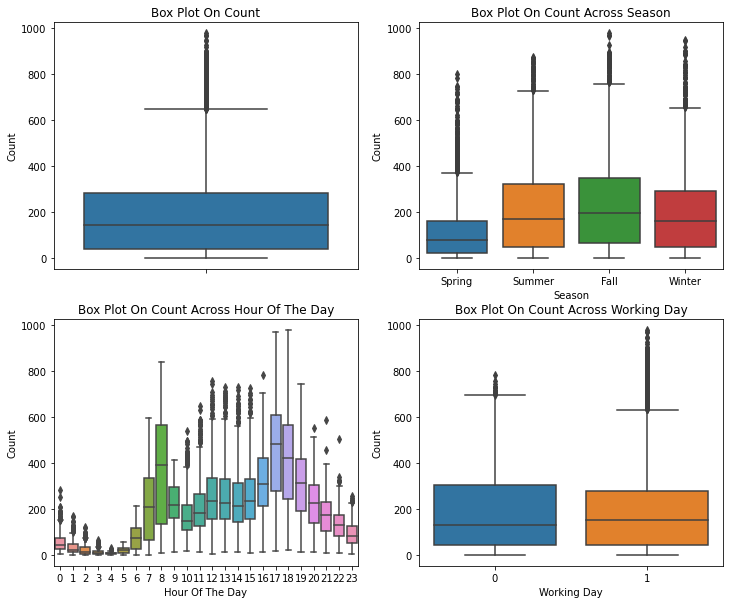

In [74]:
# Stworzenie płórna i obiektu z wykresami
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

# Cztery boxploty
sn.boxplot(data=bs,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=bs,y="count",x="season",orient="v",ax=axes[0][1]) 
sn.boxplot(data=bs,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=bs,y="count",x="workingday",orient="v",ax=axes[1][1])

# Wizualizacja - konfiguracja osi
axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

## 3.  Analiza wpływu zmiennych objaśniających (dyskretnych)

In [75]:
# Kolejność kategorii:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

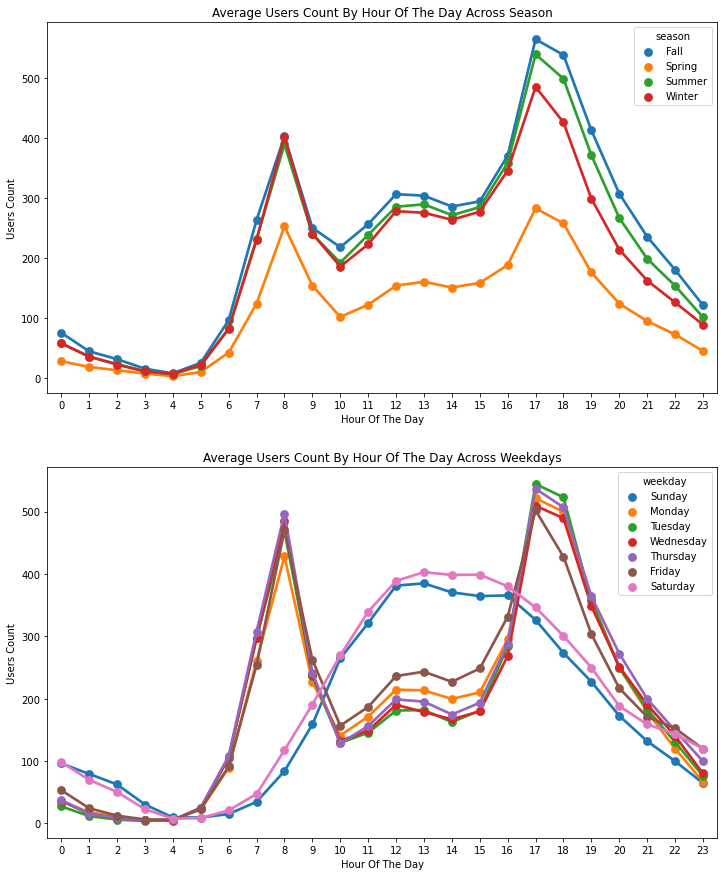

In [76]:
# Stwórzmy płótno i obiekty z wykresami
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(12,15)


# Wykresy
sn.pointplot(x="hour",  # zmienna zamapowana na x?
             y="count", # zmienna zamapowana na y?
             hue="season", # zmienna zamapowana jako kolor
             data=hourAggSeas, # dane 
             join=True, # czy łączyć punkty linią
             ax=ax1) # do którego obiektu przypisać wyniki?
sn.pointplot(x="hour", # zmienna zamapowana na x
             y="count",# zmienna zamapowana na y
             hue="weekday", # zmienna zamapowana jako kolor
             hue_order=hueOrder, #kolejność wyświetlania kolorów na legendzie
             data=hourAggWday, # dane 
             join=True, # czy łączyć punkty linią
             ax=ax2) # do którego obiektu przypisać wyniki?

ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')
plt.show()

## 4. Analiza wpływu zmiennych objaśniających (ciągłych)

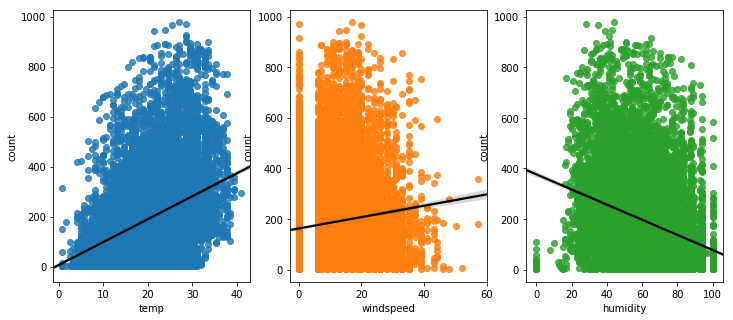

In [27]:
# Wykresy kropkowe z regresją:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=bs,ax=ax1, line_kws = {'color' : 'black'})
sn.regplot(x="windspeed", y="count", data=bs, ax=ax2, line_kws = {'color' : 'black'})
sn.regplot(x="humidity", y="count", data=bs, ax=ax3, line_kws = {'color' : 'black'})

## 5.  Analiza korelacji

In [78]:
# Wybierzmy zmienne ciągłe
corrMatt = bs[["temp","atemp","humidity","windspeed","count"]].corr()

In [79]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = 0 # Usunięcie eartości z maciezy dolnotrójkątnej
mask

array([[ 0.        ,  0.98494811, -0.06494877, -0.01785201,  0.39445364],
       [ 0.        ,  0.        , -0.04353571, -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        , -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

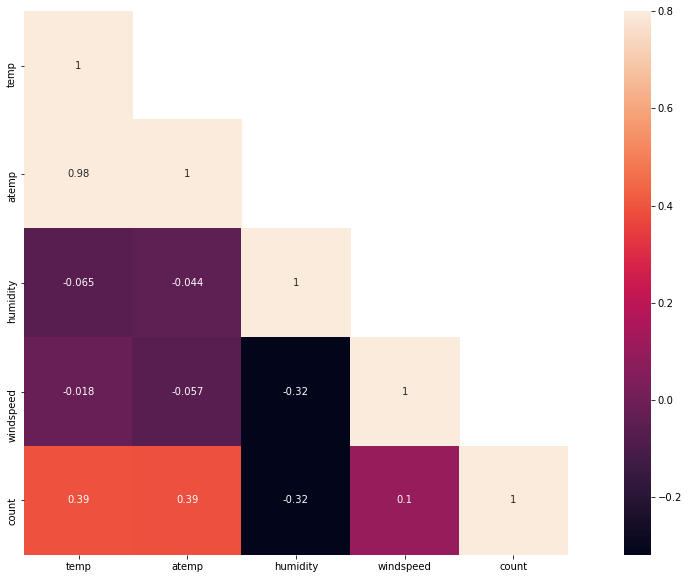

In [80]:
# Zamieniamy naarraya numpy'ego
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask = mask, vmax=.8, square=True,annot=True)

Więcej informacji: https://labmasters.pl/kursy-otwarte/python/p-1/

![alt text](img/LM.png)